<a href="https://colab.research.google.com/github/RonnyGuevara/Machine-Learning/blob/main/TP7/TP7_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 7: Reducción de Dimensionalidad

##Presentado por: Ronny Guevara

## Objetivo General
Desarrollar algoritmos de aprendizaje automático  que permita la reducción dimensional de un dataset
## Objetivos Específicos
*   Desarrollar un modelo de reducción de dimensionalidad que permita retener la mayor característica de los atributos
*   Visualizar los resultados 

###Problema
El presente trabajo práctico da solución al siguiente ejercicio:

El dataset de Sommelier de cerveza contiene 871901 reportes de cervezas 
scrappeados y 13 atributos del sitio BeerAdvocates. El objetivo es agrupar los tipos de
cervezas de acuerdo a dichos reportes, y elegir una de ellas como la 
mejor representante de cada grupo.
A continuación se describen los atributos:

*   brewery_name - nombre de la cervecería
*   beer_style - tipo de cerveza
*   nombre_cerveza - nombre de la cerveza
*   beer_abv - nivel de alcohol
*   review_appearance - Revisión de apariencia
*   review_aroma - revisión de fragancias
*   review_palate - revisión de sabor (paladar)
*   review_taste - revisión de sabor (gusto)
*   review_overall - descripción general




In [1]:
#Lectura de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

###1. Tratamiento de los datos

In [2]:
#Lectura de datos
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBEE/data/beer_reviews_1.csv")
df

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.00,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.20,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.50,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.00,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.70,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871896,147,Stone Brewing Co.,1285613705,4.0,4.0,4.5,CHILLINDYLAN,American Barleywine,4.5,4.5,Stone Old Guardian Barley Wine Style Ale 2010,11.10,56068
871897,147,Stone Brewing Co.,1285125252,4.5,4.0,4.5,drabmuh,American Barleywine,4.0,4.0,Stone Old Guardian Barley Wine Style Ale 2010,11.10,56068
871898,147,Stone Brewing Co.,1284682404,4.5,4.5,4.5,tavernjef,American Barleywine,4.0,4.5,Stone Old Guardian Barley Wine Style Ale 2010,11.10,56068
871899,147,Stone Brewing Co.,1030630588,4.0,4.0,3.5,uglyguy,American Barleywine,4.5,4.5,Stone Old Guardian Barley Wine Style Ale 2002,9.91,3678


In [3]:
#Visualización de los atributos
df.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [4]:
#Cuenta los valores nulos para cada columna
df.isna().sum()

brewery_id                0
brewery_name              9
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      181
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              36242
beer_beerid               0
dtype: int64

In [5]:
#Permite obtener los estadísticos descriptivos
df.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,871901.000000,8.719010e+05,871901.000000,871901.000000,871901.000000,871901.000000,871901.000000,835659.000000,871901.000000
mean,3271.796264,1.227348e+09,3.828825,3.755972,3.856491,3.757737,3.808603,7.046130,23337.928449
std,5644.054301,7.531277e+07,0.704718,0.677216,0.597753,0.662392,0.711305,2.330143,22030.109041
min,1.000000,8.406720e+08,0.000000,1.000000,0.000000,1.000000,1.000000,0.010000,3.000000
25%,140.000000,1.179688e+09,3.500000,3.500000,3.500000,3.500000,3.500000,5.300000,2151.000000
50%,590.000000,1.243041e+09,4.000000,4.000000,4.000000,4.000000,4.000000,6.500000,17770.000000
75%,2743.000000,1.289962e+09,4.500000,4.000000,4.000000,4.000000,4.500000,8.500000,41722.000000
max,28003.000000,1.326285e+09,5.000000,5.000000,5.000000,5.000000,5.000000,57.700000,77314.000000


In [6]:
#info() devuelve el total de valores no nulos y tipo de dato para cada atributo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871901 entries, 0 to 871900
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   brewery_id          871901 non-null  int64  
 1   brewery_name        871892 non-null  object 
 2   review_time         871901 non-null  int64  
 3   review_overall      871901 non-null  float64
 4   review_aroma        871901 non-null  float64
 5   review_appearance   871901 non-null  float64
 6   review_profilename  871720 non-null  object 
 7   beer_style          871901 non-null  object 
 8   review_palate       871901 non-null  float64
 9   review_taste        871901 non-null  float64
 10  beer_name           871901 non-null  object 
 11  beer_abv            835659 non-null  float64
 12  beer_beerid         871901 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 86.5+ MB


###Eliminación de valores nulos
La función pandas. DataFrame. dropna() elimina los valores nulos del DataFrame dejando caer las filas o columnas que contienen los valores nulos.

In [7]:
# Drop null row values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835471 entries, 0 to 871900
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   brewery_id          835471 non-null  int64  
 1   brewery_name        835471 non-null  object 
 2   review_time         835471 non-null  int64  
 3   review_overall      835471 non-null  float64
 4   review_aroma        835471 non-null  float64
 5   review_appearance   835471 non-null  float64
 6   review_profilename  835471 non-null  object 
 7   beer_style          835471 non-null  object 
 8   review_palate       835471 non-null  float64
 9   review_taste        835471 non-null  float64
 10  beer_name           835471 non-null  object 
 11  beer_abv            835471 non-null  float64
 12  beer_beerid         835471 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 89.2+ MB


In [8]:
print(df.isnull().sum())

brewery_id            0
brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
dtype: int64


En el conjunto de datos, la columna de tiempo de revisión tiene un tipo de datos de int64, por tanto, se convierte a un formato de fecha y hora

In [9]:
df.review_time = pd.to_datetime(df.review_time,unit = 's')

###Debemos preguntarnos, ¿es posible que un usuario califico la misma cerveza más de una vez?


In [10]:
# Ordenamos el atributo 'review_overall'
df = df.sort_values('review_overall', ascending=False)

# keep='first' mantiene la calificación más alta del usuario y elimina el resto
df = df.drop_duplicates(subset= ['review_profilename','beer_name'], keep='first')
df.info()

# Imprime el porcentaje de datos duplicados
print("Porcentaje de valores duplicados:", round((1518478 - 1496263)/ 1518478 * 100, 2),"%")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824468 entries, 136263 to 39648
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   brewery_id          824468 non-null  int64         
 1   brewery_name        824468 non-null  object        
 2   review_time         824468 non-null  datetime64[ns]
 3   review_overall      824468 non-null  float64       
 4   review_aroma        824468 non-null  float64       
 5   review_appearance   824468 non-null  float64       
 6   review_profilename  824468 non-null  object        
 7   beer_style          824468 non-null  object        
 8   review_palate       824468 non-null  float64       
 9   review_taste        824468 non-null  float64       
 10  beer_name           824468 non-null  object        
 11  beer_abv            824468 non-null  float64       
 12  beer_beerid         824468 non-null  int64         
dtypes: datetime64[ns](1), flo

Observamos un 1.46% de valores duplicados, dando a conocer que hubo usuarios que calificaron la misma cerveza varias ocasiones.

Es importante conocer si existe algún tipo de asociación entre atributos, corr() describe la correlación entre atributos de la dataframe

In [11]:
df.corr()

,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
brewery_id,1.000000,-0.003749,0.034198,0.009777,0.007349,0.005494,0.077822,0.460838
review_overall,-0.003749,1.000000,0.595280,0.475798,0.686437,0.779704,0.111802,0.007011
review_aroma,0.034198,0.595280,1.000000,0.532570,0.590504,0.697554,0.312657,0.089894
review_appearance,0.009777,0.475798,0.532570,1.000000,0.539759,0.517960,0.237579,0.066183
review_palate,0.007349,0.686437,0.590504,0.539759,1.000000,0.715339,0.258309,0.057766
review_taste,0.005494,0.779704,0.697554,0.517960,0.715339,1.000000,0.265377,0.042048
beer_abv,0.077822,0.111802,0.312657,0.237579,0.258309,0.265377,1.000000,0.246182
beer_beerid,0.460838,0.007011,0.089894,0.066183,0.057766,0.042048,0.246182,1.000000


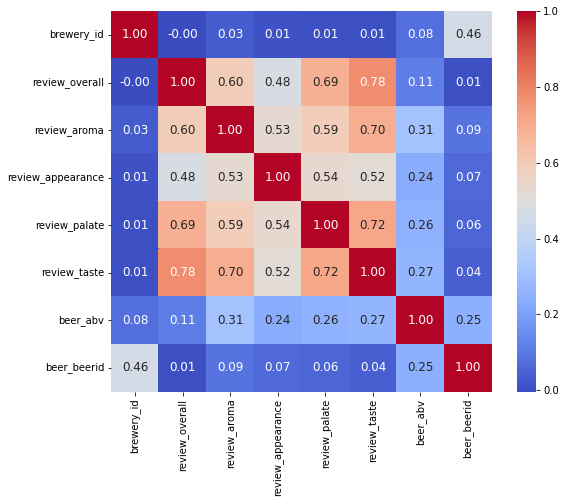

In [12]:
corr = df.corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
           xticklabels= corr, yticklabels= corr,
           cmap= 'coolwarm')

Para una mejor interpretación se visualiza la correlación entre atributos, dando como resultado que no existen columnas con multicolinealidad

###Visualiazión de histogramas y densidad para cada variable

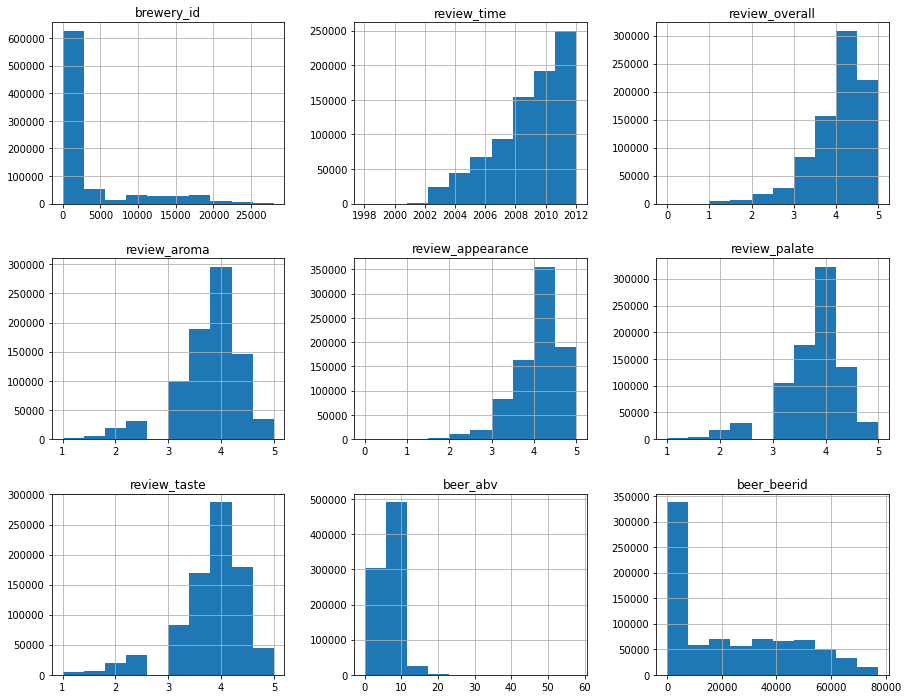

In [13]:
df.hist(figsize=(15,12))
plt.show()

##Reducción de la dimensionalidad
###Proceso de decodificación de datos

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [15]:
labelEncoder = LabelEncoder()
df["beer_name"] = labelEncoder.fit_transform(df["beer_name"])
df["beer_style"] = labelEncoder.fit_transform(df["beer_style"])
df["review_profilename"] = labelEncoder.fit_transform(df["review_profilename"])
df["brewery_name"] = labelEncoder.fit_transform(df["brewery_name"])

###Verificación de valores atípicos utilizando box plot

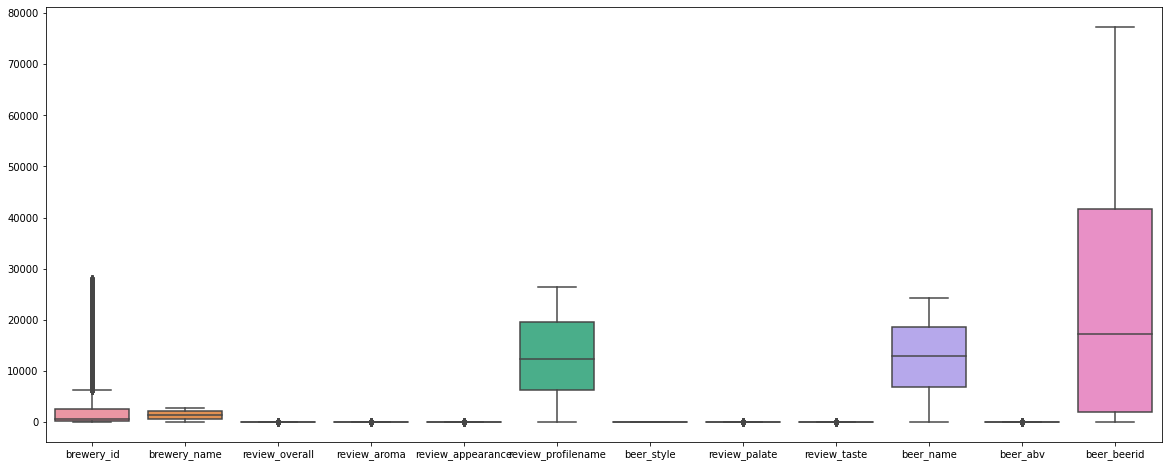

In [16]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = df, width = 0.8)
plt.show()

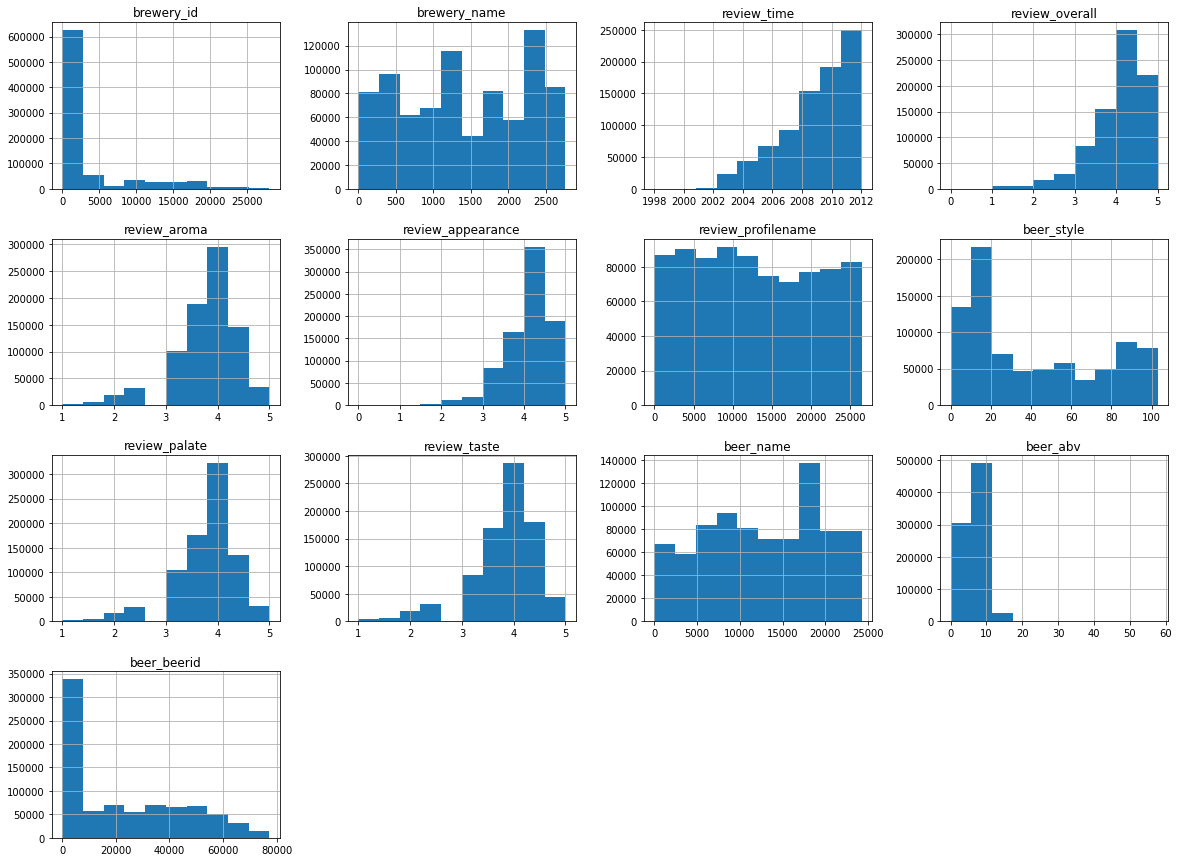

In [17]:
df.hist(figsize=(20,15))
plt.show()

###Eliminación de columnas innecesarias

In [18]:
df = df.drop(columns = 'brewery_id', axis = 1)
df = df.drop(columns = 'review_time', axis = 1)
df = df.drop(columns = 'review_profilename', axis = 1)
df = df.drop(columns = 'beer_beerid', axis = 1)
df

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv
136263,2059,5.0,4.5,4.5,11,5.0,5.0,15589,10.0
49055,2394,5.0,4.0,4.5,81,4.5,4.5,20548,5.0
781379,2412,5.0,4.5,4.5,7,4.0,4.5,5302,5.1
712593,924,5.0,4.5,4.0,12,4.5,4.0,5949,6.0
431158,1518,5.0,4.5,4.0,37,5.0,5.0,1041,7.1
...,...,...,...,...,...,...,...,...,...
653726,2141,0.0,2.0,0.0,61,3.0,1.5,17567,4.0
37234,950,0.0,2.0,0.0,36,3.0,2.0,17002,4.0
653740,2141,0.0,2.0,0.0,40,2.5,2.0,17559,4.0
653695,2141,0.0,2.0,0.0,65,2.5,2.0,17557,4.0


Utilizaremos la variable 'review_overall' como target, por tanto se requiere convertir los datos, todo número >= 4 asumirá el valor de 1, para todo número < 4 asumirá el valor de 0

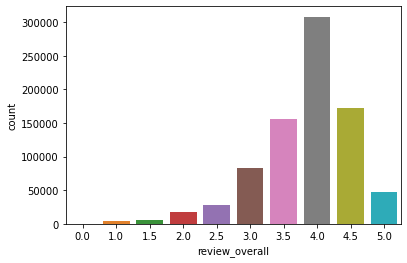

In [19]:
sns.countplot(df['review_overall'],label="Count")

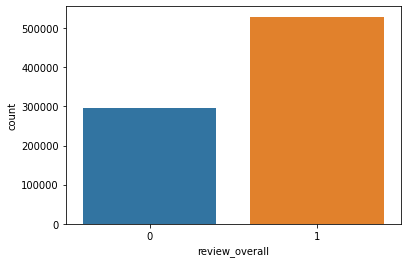

In [20]:
df['review_overall']=df['review_overall'].map({4.0:1, 4.5:1, 5.0:1, 3.5:0, 3.0:0, 2.5:0, 2.0:0 ,1.5:0, 1.0:0, 0.0:0})
sns.countplot(df['review_overall'],label="Count")

###Escalamiento de datos
Es importante eliminar valores atípicos en los datos y trabajar a una misma escala.

In [21]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

X = df.drop(columns = 'review_overall', axis = 1)
y = df['review_overall']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
df.var(axis=0)

brewery_name         6.924426e+05
review_overall       2.299946e-01
review_aroma         4.545097e-01
review_appearance    3.545127e-01
beer_style           1.108906e+03
review_palate        4.337278e-01
review_taste         5.001589e-01
beer_name            4.625348e+07
beer_abv             5.441326e+00
dtype: float64

Se solicita al usuario elegir el porcentaje de entrenamiento para el clasificador.

In [23]:
#@title Seleccione el procentaje de entrenamiento { run: "auto" }
test_size1 = 0.3 #@param {type:"slider", min:0, max:1, step:0.1}
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = test_size1, random_state = 0)
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 577127 datos para entrenamiento y 247341 datos para prueba


###Clasificador KNN vecinos más cercanos

Precisión Vecinos más Cercanos: 0.8247763209496202
[[ 66549  22078]
 [ 21262 137452]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.75     88627
           1       0.86      0.87      0.86    158714

    accuracy                           0.82    247341
   macro avg       0.81      0.81      0.81    247341
weighted avg       0.82      0.82      0.82    247341



Text(0.5, 15.0, 'Y_pred')

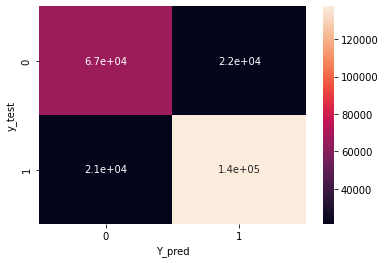

In [24]:
from sklearn import neighbors
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print('Precisión Vecinos más Cercanos: {}'.format(metrics.accuracy_score(prediction,y_test)))
print(metrics.confusion_matrix(y_test, prediction, labels=[0, 1]))
print(metrics.classification_report(y_test, prediction, labels=[0, 1]))
cm = confusion_matrix(y_test, prediction , labels=[0, 1])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax= ax)
ax.set_ylabel('y_test')
ax.set_xlabel('Y_pred')

###LinearRegression

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.4182479473894941

In [26]:
lr.score(X_test, y_test)

0.4157490314322162

In [27]:
y_pred = lr.predict(X_test)
print(f'MSE:{mean_squared_error(y_test,y_pred)} RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))} r2:{r2_score(y_test,y_pred)}')

MSE:0.13433479049319352 RMSE:0.3665171080498065 r2:0.4157490314322162


¿Como influye cada variable?

In [28]:
coef = pd.Series(data=np.round(lr.coef_,2),index = X.columns)
coef.sort_values(ascending=False)

review_taste         0.21
review_palate        0.10
review_aroma         0.03
review_appearance    0.01
brewery_name         0.00
beer_name            0.00
beer_style          -0.01
beer_abv            -0.04
dtype: float64

Como podemos observar la dimensionalidad del dataset influye en la precisión de los modelos de clasificación, aplicaremos PCA para reducir el dataset

###PCA
Principal Component Analysis (PCA) es un método estadístico que permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información

In [29]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [30]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8', 'PC9']
)

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv
PC1,-0.020314,-0.393019,-0.448563,-0.392548,0.022878,-0.458494,-0.480347,0.007053,-0.219767
PC2,-0.689903,-0.061197,0.010671,0.015852,0.067863,-0.011108,-0.019777,-0.696018,0.174247
PC3,0.297750,-0.148585,0.004095,-0.010349,-0.797442,-0.059933,-0.066367,-0.250158,0.427381
PC4,0.007127,-0.362380,0.073761,0.066817,0.415122,-0.070709,-0.091205,0.265945,0.776115
PC5,0.658092,0.003958,0.015741,-0.049118,0.428463,0.001032,0.012860,-0.616585,-0.017750
PC6,-0.035348,0.500229,-0.082122,-0.790116,0.033748,0.021992,0.159900,0.044595,0.297179
PC7,0.024038,0.514024,-0.663891,0.424778,0.041967,0.010427,-0.255698,-0.004208,0.216206
PC8,-0.001644,0.380084,0.439125,0.161928,0.012134,-0.789147,-0.112793,0.002915,0.029168
PC9,-0.000197,0.171656,0.390699,-0.087922,0.001904,0.397142,-0.807661,0.003309,-0.010295


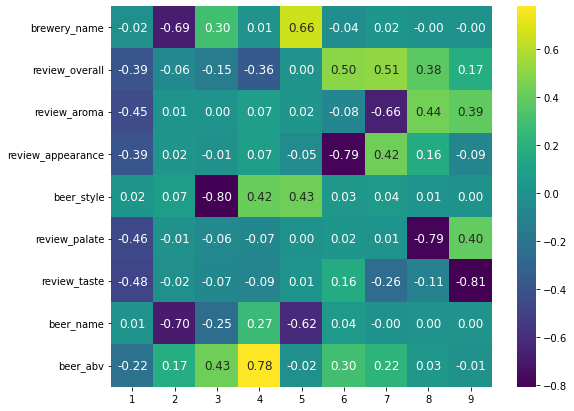

In [31]:
componentes = modelo_pca.components_
plt.figure(figsize=(9, 7))
sns.heatmap(componentes.T, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
           xticklabels= np.arange(modelo_pca.n_components_) + 1, yticklabels= df.columns,
           cmap= 'viridis')

Porcentaje de varianza explicada por cada componente
[0.37648893 0.12975378 0.12135959 0.09707019 0.08848167 0.06738779
 0.04988507 0.04304721 0.02652579]


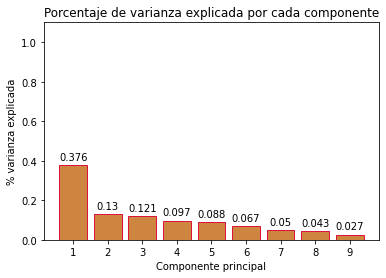

In [32]:
print('Porcentaje de varianza explicada por cada componente')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(x = np.arange(modelo_pca.n_components_) + 1, height = modelo_pca.explained_variance_ratio_, color = 'peru', edgecolor  = 'crimson', label='Varianza individual explicada')

for x, y in zip(np.arange(len(df.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 3)
    ax.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center')

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('% varianza explicada');

Observemos el comportamiento del PCA a 2 componentes


In [33]:
pca=PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [34]:
transformada=pca.transform(X_scaled)

In [35]:
print(df.shape)
print(transformada.shape)

(824468, 9)
(824468, 2)


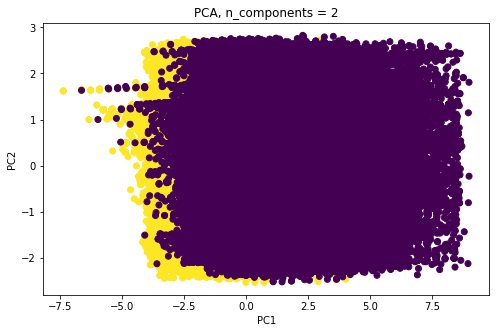

In [36]:
plt.figure(figsize=(8, 5))  
plt.scatter(transformada[:,0],transformada[:,1], c=df.review_overall)
plt.gca()
plt.title("PCA, n_components = 2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()